Face Regonition
โดยใช้วิธีการ PCA (Principal Component Analyis) เพื่อลดขนาดของ Feature และนำไปทำงานร่วมกับ SVM (Support Vector Machine) เพื่อเรียนรู้และสร้างโมเดลสำหรับทำนายผลใบหน้า
(ปจบ. ไม่นิยมใช้ SVM แล้ว และเปลี่ยนมานิยมใช้ Neural Networl)



สร้างโมเดลด้วยอัลกอริทึม SVM (Support Vector Machine)
เป็นอัลกอริทึมในการคัดแยกข้อมูลด้านการประมวลผลเป็นภาพดิจิตอล (ปัจจุบันใช้ Neural Network แทน)


หลักการของ SVM (Support Vector Machine)
การกำหนดให้ข้อมูล (Input) ที่ใช้ฝึกเป็นVector ใน Space จำนวน N มิติเพื่อการสร้างเส้นไฮเปอร์เพลน (Hyperplane) หรือเส้นแบ่งระหว่างกลางเพื่อแยกกลุ่ม Class ของ Vector ออกเป็นกลุ่มต่างๆ

Kernel คือ 
รูปแบบการใช้งานพื้นที่อินพุตที่มีมิติต่ำและแปลงเป็นพื้นที่มิติที่สูงขึ้นคือการทำให้เส้นที่แบ่งกลางมีความกว้างมากที่สุดส่งผลทำให้เส้น Hyperplane ค่า Margin มีค่าสูงสุด



การปรับค่าไฮเพอร์พารามิเตอร์เพื่อเพิ่มประสิทธิภาพการเรียนรู้ของโมเดล

    ค่า Regularisation (C ) คือการปรับขนาดของเรกูลาไรซ์เพื่อการป้องกันการเรียนรู้เกินขอบเขตที่กำหนดด้วยการแบ่งข้อมูลส่วนหนึ่งมาใช้ตรวจสอบ ถ้าเรียนรู้มากไป หรือ น้อยเกินไปอาจจะทำให้เกิดความผิดพลาดของการทำนายผลข้อมูลของโมเดลได้
    
    ค่า Gamma คือ อัตราการลดค่าตามระยะห่างจากเส้นแบ่ง Class ใช้ร่วมกับ RGF Kernel และค่า C


ในกรณีที่เขียนโปรแกรมจริงๆเราจะใช้ GridSearchCV มาใช้ปรับเปลี่ยนค่าพารามิเตอร์ (Tuning Parameter) ที่เหมาะสมกับโมเดลทำให้โมเดลที่สร้างขึ้นมีประสิทธิภาพที่ดีที่สุด

In [74]:
import os # กำหนด Path
os.chdir("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_lfw_people, make_blobs
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning  แบบไม่มีผู้สอน หรือก็คือไม่มีเฉลย หรือเรียกว่า class

In [24]:
# download and display image
faces = fetch_lfw_people(min_faces_per_person=60)

In [25]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


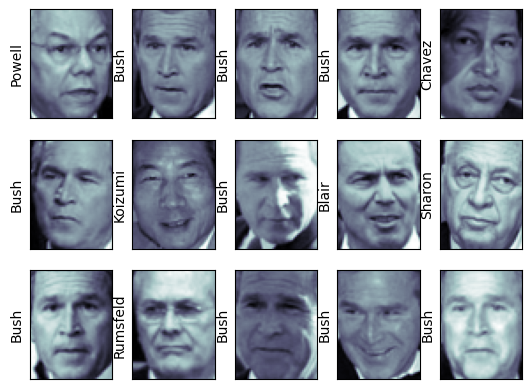

In [26]:
fig, ax = plt.subplots(3,5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color="k")
    
plt.show()

Create Model with SVM

In [54]:
# Reduce and Create Model
pca = PCA(n_components=150, svd_solver= "randomized", whiten=True)
svc = SVC(kernel="rbf", class_weight="balanced")

# connect with pipeline
model = make_pipeline(pca, svc)

# Train, Test
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size= 0.4,random_state=40)

# Crete parameter
param = {
    "svc__C":[1,5,10,50], 
    "svc__gamma":[0.0001,0.0005,0.001,0.005]
}

# Train Data to Model
grid = GridSearchCV(model,param)
grid.fit(x_train,y_train)

print(grid.best_params_)
print("__________________________________")
print(grid.best_estimator_) # นำไป assign ค่าให้กับ model 

{'svc__C': 5, 'svc__gamma': 0.001}
__________________________________
Pipeline(steps=[('pca',
                 PCA(n_components=150, svd_solver='randomized', whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.001))])


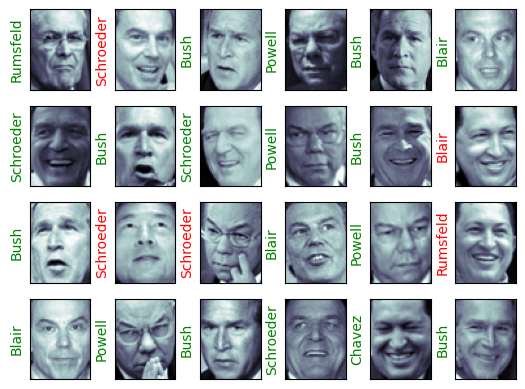

In [65]:
# ได้ model แล้วว
model = grid.best_estimator_

# Predict
y_pred = model.predict(x_test)

# Showing Pictures

fig, ax = plt.subplots(4,6)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1], color="green" if y_pred[i] == y_test[i] else "r")
    
plt.show()


In [70]:
print(f"Accuracy Score = {accuracy_score(y_test, y_pred) * 100}")

Accuracy Score = 82.22222222222221


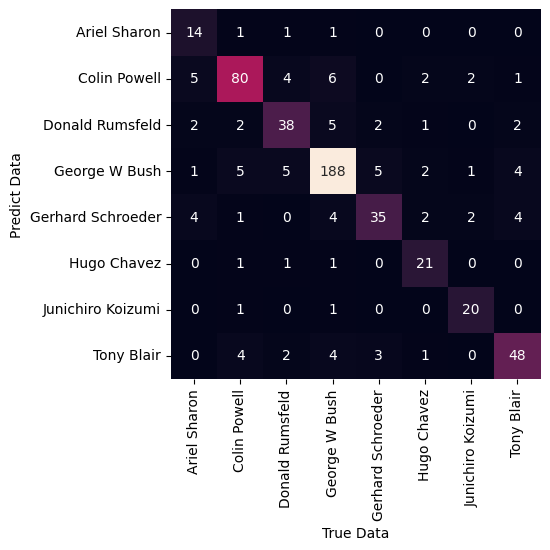

In [78]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(
    mat.T, 
    square=True, 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=faces.target_names, 
    yticklabels=faces.target_names
)
plt.xlabel("True Data")
plt.ylabel("Predict Data")
plt.show()